In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [141]:
df = pd.read_csv("D:\\UIT\\N3__HK2__2022-2023\\IS217.N21__KDL&OLAP\\project\\data\\Global_SuperStore.csv", encoding='latin-1')

print('Number of rows:', df.shape[0])

Number of rows: 51290


In [142]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode ID,...,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,CA-2012-124891,41121,41121,1,...,2309.650,7,0.0,762.1845,933.57
1,26341,IN-2013-77878,41310,41312,2,...,3709.395,9,0.1,-288.7650,923.63
2,25330,IN-2013-71249,41564,41565,3,...,5175.171,9,0.1,919.9710,915.49


In [143]:
print('How many missing values? ', df.isnull().values.sum())

How many missing values?  0


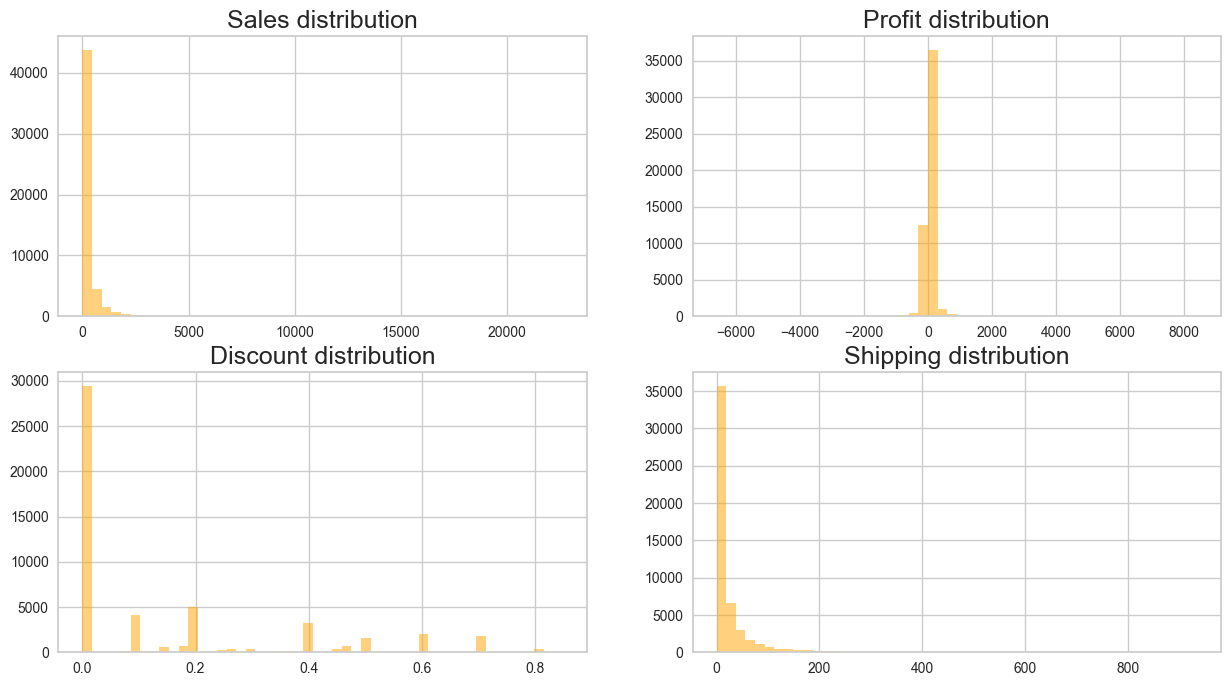

In [144]:
plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.hist(df['Sales'], bins=50, color='orange', alpha=.5)
plt.title('Sales distribution', fontsize=18)

plt.subplot(2,2,2)
plt.hist(df['Profit'], bins=50, color='orange', alpha=.5)
plt.title('Profit distribution', fontsize=18)

plt.subplot(2,2,3)
plt.hist(df['Discount'], bins=50, color='orange', alpha=.5)
plt.title('Discount distribution', fontsize=18)

plt.subplot(2,2,4)
plt.hist(df['Shipping Cost'], bins=50, color='orange', alpha=.5)
plt.title('Shipping distribution', fontsize=18)

plt.show()

In [145]:
df.keys()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode ID',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Location ID',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost'],
      dtype='object')

In [146]:
# For ease of calculation lets scale all the values between 0-1
from sklearn.preprocessing import MinMaxScaler

data = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

# columns = list(data.columns)
# scaler = MinMaxScaler(feature_range=(0,1))
# data = scaler.fit_transform(data)
# data = pd.DataFrame(data, columns=columns)

print(data.head(5))
print(data.shape)

      Sales  Quantity  Discount    Profit  Shipping Cost
0  2309.650         7       0.0  762.1845         933.57
1  3709.395         9       0.1 -288.7650         923.63
2  5175.171         9       0.1  919.9710         915.49
3  2892.510         5       0.1  -96.5400         910.16
4  2832.960         8       0.0  311.5200         903.04
(51290, 5)


C:\Users\kiennam\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kiennam\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kiennam\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kiennam\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

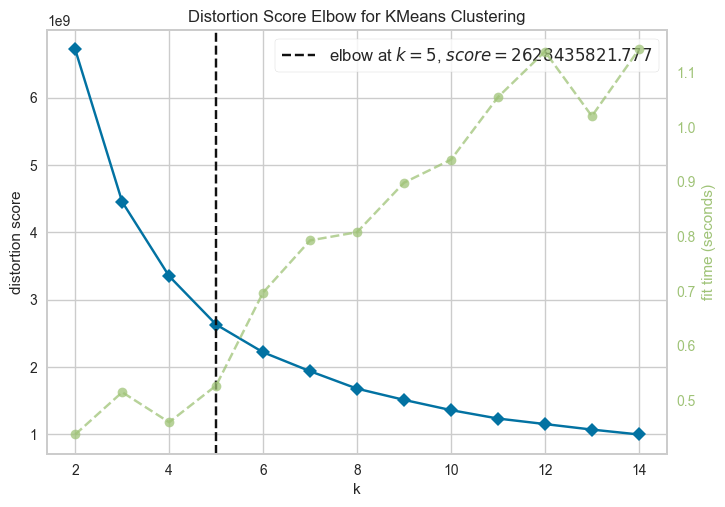

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(data)
visualizer.poof()

In [166]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

C:\Users\kiennam\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [167]:
# Predicting the Clusters
predictions = k_fit.labels_
data['Clusters'] = predictions
data.head()

C:\Users\kiennam\AppData\Local\Temp\ipykernel_4120\2455114620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = predictions


,Sales,Quantity,Discount,Profit,Shipping Cost,Clusters,Index
0,2309.650,7,0.0,762.1845,933.57,1,0
1,3709.395,9,0.1,-288.7650,923.63,1,1
2,5175.171,9,0.1,919.9710,915.49,1,2
3,2892.510,5,0.1,-96.5400,910.16,1,3
4,2832.960,8,0.0,311.5200,903.04,1,4


In [168]:
data['Clusters'].value_counts()

1    10335
4    10291
3    10235
2    10219
0    10210
Name: Clusters, dtype: int64

In [169]:
data.groupby('Clusters').mean()

,Sales,Quantity,Discount,Profit,Shipping Cost,Index
Clusters,,,,,,
0,49.327962,3.014496,0.148297,3.345177,3.389841,35949.500000
1,821.573252,4.664925,0.106893,109.509987,98.914833,5167.003677
2,100.974049,3.463255,0.124635,8.187653,7.988068,25735.000000
3,21.980515,2.342648,0.216096,0.362771,1.045080,46172.000000
4,232.346661,3.882422,0.119084,20.807961,19.783710,15479.996307


In [170]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,25681.525000,1760.946943,1
1,25703.447462,2898.127509,1
2,25732.123069,4583.699602,1
3,25686.994256,2142.886445,1
4,25685.894360,2171.782192,1


Text(0.5, 1.0, 'Personality Clusters after PCA')

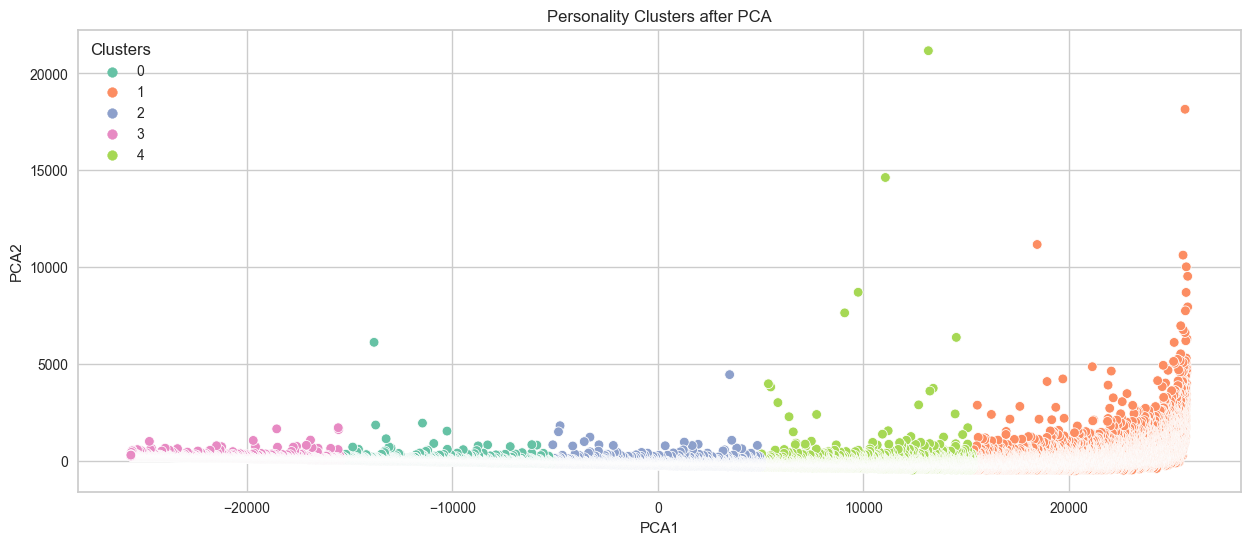

In [174]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2')
plt.title('Personality Clusters after PCA')

In [175]:
data['Index'] = data.index

C:\Users\kiennam\AppData\Local\Temp\ipykernel_4120\1902260860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Index'] = data.index


Text(0.5, 1.0, 'Quantity')

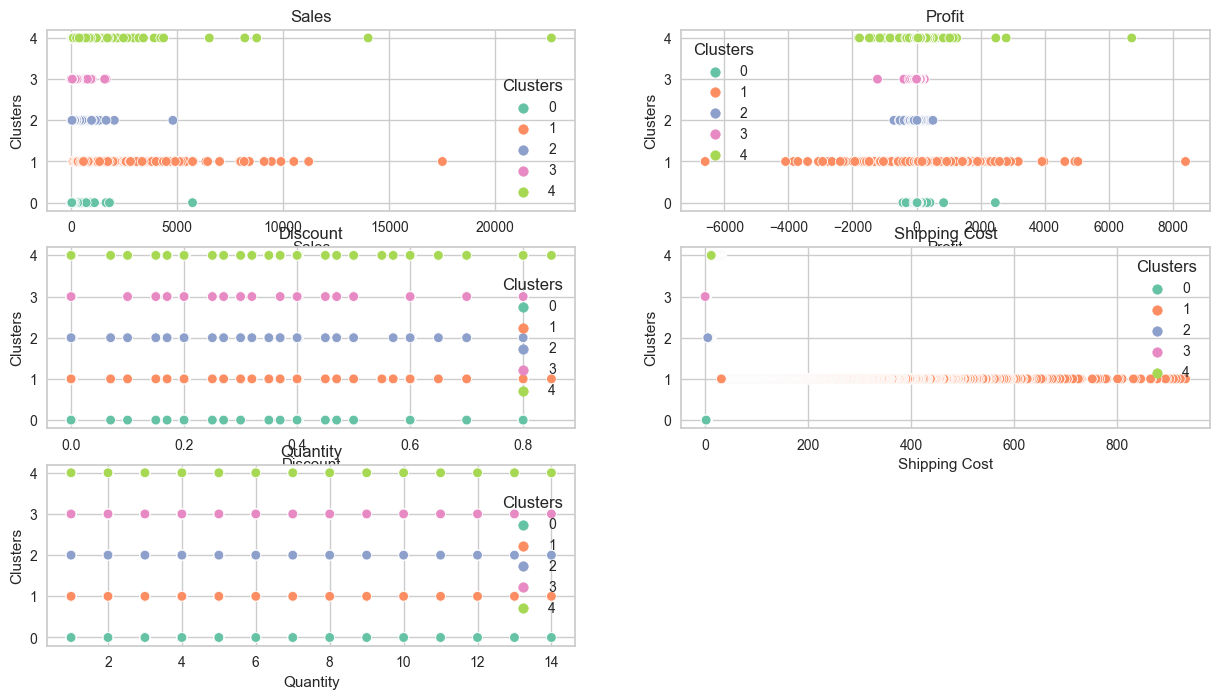

In [176]:
plt.figure(figsize=(15, 8))

plt.subplot(3,2,1)
sns.scatterplot(data=data, x='Sales', y='Clusters', hue='Clusters', palette='Set2')
plt.title("Sales")

plt.subplot(3,2,2)
sns.scatterplot(data=data, x='Profit', y='Clusters', hue='Clusters', palette='Set2')
plt.title("Profit")

plt.subplot(3,2,3)
sns.scatterplot(data=data, x='Discount', y='Clusters', hue='Clusters', palette='Set2')
plt.title("Discount")

plt.subplot(3,2,4)
sns.scatterplot(data=data, x='Shipping Cost', y='Clusters', hue='Clusters', palette='Set2')
plt.title("Shipping Cost")

plt.subplot(3,2,5)
sns.scatterplot(data=data, x='Quantity', y='Clusters', hue='Clusters', palette='Set2')
plt.title("Quantity")

In [177]:
df['Clusters'] = predictions

In [178]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode ID,...,Quantity,Discount,Profit,Shipping Cost,Clusters
0,32298,CA-2012-124891,41121,41121,1,...,7,0.0,762.1845,933.570,1
1,26341,IN-2013-77878,41310,41312,2,...,9,0.1,-288.7650,923.630,1
2,25330,IN-2013-71249,41564,41565,3,...,9,0.1,919.9710,915.490,1
3,13524,ES-2013-1579342,41302,41304,3,...,5,0.1,-96.5400,910.160,1
4,47221,SG-2013-4320,41583,41584,1,...,8,0.0,311.5200,903.040,1
...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,41809,41809,1,...,5,0.0,4.5000,0.010,3
51286,35398,US-2014-102288,41810,41814,4,...,1,0.8,-1.1100,0.010,3
51287,40470,US-2013-155768,41610,41610,1,...,3,0.0,11.2308,0.010,3
51288,9596,MX-2012-140767,40957,40961,4,...,2,0.0,2.4000,0.003,3


In [180]:
df.to_excel("clustered_data_2.xlsx")